<a href="https://colab.research.google.com/github/mainarel/Numerical_Methods_6/blob/main/1_Wave_equation2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решение волнового уравнения:

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter
import math


aa = 1/math.sqrt(2)

a0, b0, a1, b1 = -1, 2, -1, 2

def stability_condition(h, tau):
  if (aa * tau) / h <= 1:
    return True
  else:
    return False

def u0(x,t):
  return 2/3*np.exp(t-x**2)

def f(x,t):
  return 8/6*(1-x**2)*np.exp(t-x**2)

#начальные условия
def phi1(x):
  return 2/3*np.exp(-x**2)

def phi2(x):
  return 2/3*np.exp(-x**2)

#граничные условия
def gamma1(t):
  return 4/3*np.exp(t)

def gamma2(t):
  return 8/3*np.exp(t-1)

xmin =  0
xmax = 1
h_cur = 0.01

tmin = 0
tmax = 1
tau_cur = 0.005

# Аппроксимация 1 порядка:

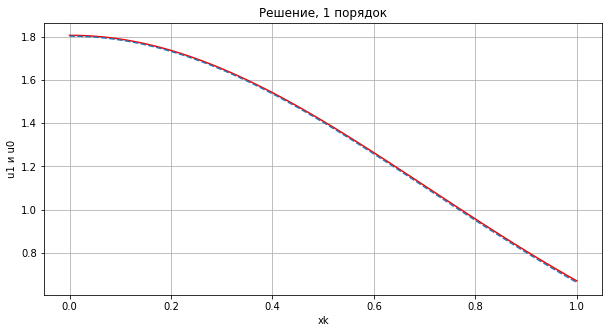

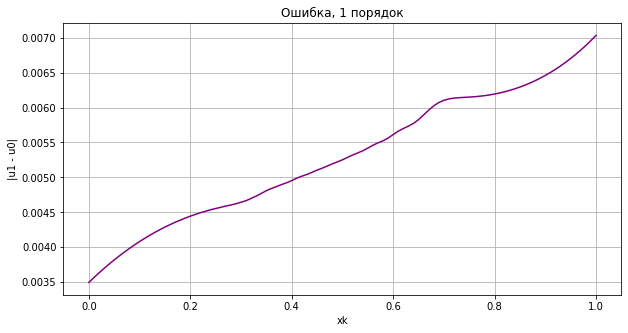

In [20]:
def ap1(h, tau):

  xk = np.arange(xmin, xmax + h, h)
  tn = np.arange(tmin, tmax + tau, tau)
  u1 = np.zeros((3,len(xk)))
  
  
  #аппроксимация начальных условий
  for k in range (len(xk)):
    u1[0][k] = phi1(xk[k])
    u1[1][k] = phi2(xk[k]) * tau + phi1(xk[k])

  #аппроксимация граничных условий
  for i in range(2, len(tn)):
        for k in range(1, len(xk) - 1):
            u1[2][k] = (aa * tau / h) ** 2 * (u1[1][k + 1] - 2 * u1[1][k] + u1[1][k - 1]) + tau ** 2 * f(xk[k], tn[i - 1]) + 2 * u1[1][k] - u1[0][k]

        u1[2][0] = (gamma1(tn[i]) - (a0 / h) * u1[2][1]) * (h / (b0 * h - a0))
        u1[2][-1] = (gamma2(tn[i]) + (a1 / h) * u1[2][-2]) * (h / (b1 * h + a1))

        u1[0] = [u1[1][k] for k in range(len(u1[0]))]
        u1[1] = [u1[2][k] for k in range(len(u1[0]))]

  return u1[-1]

xk_cur = np.arange(xmin, xmax + h_cur, h_cur)
tn_cur = np.arange(tmin, tmax , tau_cur)

yreal1 = [0] * len(xk_cur)
for k in range(len(xk_cur)):
     yreal1[k] = u0(xk_cur[k], tn_cur[-1])

ypol1 = ap1(h_cur,tau_cur)
diff1 = [abs(yreal1[i] - ypol1[i]) for i in range(len(yreal1))]

plt.figure(figsize=(10,5))
plt.title("Решение, 1 порядок")
plt.xlabel("xk")
plt.ylabel("u1 и u0")
plt.grid()
plt.plot(xk_cur, ypol1, color='red')
plt.plot(xk_cur, yreal1 , linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Ошибка, 1 порядок")
plt.xlabel("xk")
plt.ylabel("|u1 - u0|")
plt.grid()
plt.plot(xk_cur, diff1, color='purple')


# Аппроксимация 2 порядка:

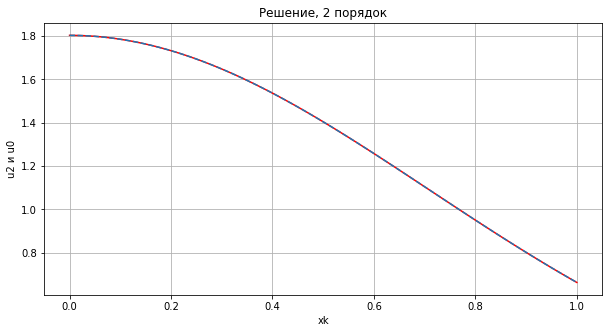

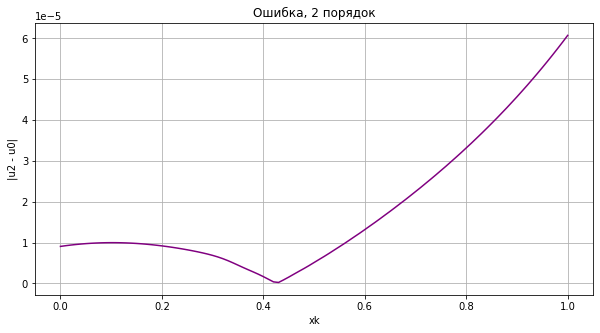

In [21]:
def d2phi1(x):
  return (8*x**2-4)/(3*np.exp(x**2))

def ap2(h,tau):

  xk = np.arange(xmin, xmax + h, h)
  tn = np.arange(tmin, tmax, tau)
  u2 = np.zeros((3,len(xk)))


  #аппроксимация начальных условий
  u2[0] = phi1(xk)
  u2[1] = u2[0] + tau * phi2(xk) + tau**2 / 2 * (aa**2 * d2phi1(xk) + f(xk, 0))


  for i in range(2, len(tn)):
        for k in range(1, len(xk) - 1):
            u2[2][k] = 0.5*( tau / h) ** 2 * (u2[1][k + 1] - 2 * u2[1][k] + u2[1][k - 1]) + tau ** 2 * f(k*h, tau*i-tau) + 2 * u2[1][k] - u2[0][k]

        u2[2][0] = 2*0.5*(tau / h) ** 2 *(u2[1][1] -(1 - h*b0/a0)*u2[1][0] - h/a0 * gamma1(i*tau-tau)) + 2*u2[1][0] - u2[0][0] + tau**2*f(0, tau*i-tau)
        u2[2][-1] = 2*0.5*(tau / h) ** 2 *(u2[1][-2] -(1 + h*b1/a1)*u2[1][-1] + h/a1 * gamma2(i*tau-tau)) + 2*u2[1][-1] - u2[0][-1] + tau**2*f(xk[-1], tau*i-tau)

        u2[0] = [u2[1][k] for k in range(len(u2[0]))]
        u2[1] = [u2[2][k] for k in range(len(u2[0]))]

  return u2[-1]
  
tn_cur = np.arange(tmin, tmax, tau_cur)
xk_cur = np.arange(xmin, xmax + h_cur, h_cur)
ypol2 = ap2(h_cur,tau_cur)
diff2 = [abs(yreal1[i] - ypol2[i]) for i in range(len(yreal1))]

plt.figure(figsize=(10,5))
plt.title("Решение, 2 порядок")
plt.xlabel("xk")
plt.ylabel("u2 и u0")
plt.grid()
plt.plot(xk_cur, ypol2, color='red')
plt.plot(xk_cur, yreal1, linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Ошибка, 2 порядок")
plt.xlabel("xk")
plt.ylabel("|u2 - u0|")
plt.grid()
plt.plot(xk_cur, diff2, color='purple')



# Зависимость ошибки от шага:

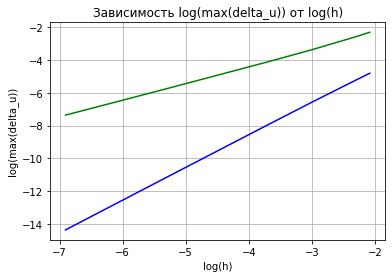

In [23]:
hrange =  [0.001, 0.0025 ,0.005, 0.025, 0.05, 0.1,  0.125 ]

error_1 = np.zeros(len(hrange))
error_2 = np.zeros(len(hrange))

for i in range(len(hrange)):
    hi = hrange[i]
    t = hi/5
    xk_h = np.arange(xmin,xmax+hi,hi)
    tn_h = np.arange(tmin, tmax, t)
    yreal = [0] * len(xk_h)
    for k in range(len(xk_h)):
        yreal[k] = u0(xk_h[k], tn_h[-1])
    
    
    trange = np.arange(tmin, tmax, t)
    ypol_ord1 = ap1(hi, t)
    ypol_ord2 = ap2(hi, t)
    error_1[i] = np.log(max([abs(ypol_ord1[j] - yreal[j]) for j in range(len(yreal))]))
    error_2[i] = np.log(max([abs(ypol_ord2[j] - yreal[j]) for j in range(len(yreal))]))

plt.figure()
plt.title("Зависимость log(max(delta_u)) от log(h)")
plt.xlabel("log(h)")
plt.ylabel("log(max(delta_u))")
plt.grid()
plt.plot(np.log(hrange), error_1, color='green', label='1 порядок')
plt.plot(np.log(hrange), error_2, color='blue', label='2 порядок')